# INTRODUCTION

we're going to be looking at movie budget and revenue data.

### IMPORT LIBRARIES

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

### LOAD THE DATA

In [2]:
data = pd.read_csv('sample_data/cost_revenue_dirty.csv')

In [3]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### DATA EXPLORATION AND DATA CLEANING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


Looking at the information above, there are no missing values in the data. Also, the columns: `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` needs to be numerical type and not object type. But then, we will have to remove the doller sign ($) before converting the type.

Also, the `Release_Date` should be a datatime type

In [5]:
# changing the data type
numerical_columns = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

In [6]:
import re
re.sub('G|g', 'B', 'Google')

'BooBle'

In [7]:
for column_name in numerical_columns:
  data[column_name] = data[column_name].str.replace('$', '').str.replace(',', '').astype('float')

<ipython-input-7-b5d702b8ed97>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column_name] = data[column_name].str.replace('$', '').str.replace(',', '').astype('float')


In [8]:
# check for the type again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   5391 non-null   int64  
 1   Release_Date           5391 non-null   object 
 2   Movie_Title            5391 non-null   object 
 3   USD_Production_Budget  5391 non-null   float64
 4   USD_Worldwide_Gross    5391 non-null   float64
 5   USD_Domestic_Gross     5391 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 252.8+ KB


In [9]:
# cgange the release date type to datetime
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   float64       
 4   USD_Worldwide_Gross    5391 non-null   float64       
 5   USD_Domestic_Gross     5391 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 252.8+ KB


#### Further exploration

In [11]:
# statistical summary of the numerical columns
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


From the statistical summary above, the following can be deduced:

* The average film costs about `$31M` to make and makes around 3x that (or `~$89M`) in worldwide revenue. So that's encouraging.
* But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is `$5M` and they only bring in `$3.8M` in worldwide revenue!
* The minimum domestic and worldwide revenue is `$0`. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.
* On the other hand, the highest production budget was `$425M` and the highest worldwide revenue was `$2.7B` revenue! Holy smokes.

**So which film was the lowest budget film in the dataset?**

In [12]:
data.loc[data['USD_Production_Budget'].idxmin()]

Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                 1100.0
USD_Worldwide_Gross                 181041.0
USD_Domestic_Gross                  181041.0
Name: 2427, dtype: object

I've never heard of this film (**My Date With Drew**). But it looks like a real money maker. It grossed `$181,041` with a measly `$1,100` budget. Wow. Talk about return on investment!

But the highest budget movie is:

In [13]:
data.loc[data['USD_Production_Budget'].idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget            425000000.0
USD_Worldwide_Gross             2783918982.0
USD_Domestic_Gross               760507625.0
Name: 3529, dtype: object

**Which movie has zero/no domestic revenue?**

In [14]:
dom_revenue = data[data['USD_Domestic_Gross'] == 0]

In [15]:
dom_revenue.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907.0,0.0,0.0
6,4630,1927-12-08,Wings,2000000.0,0.0,0.0
8,4240,1930-01-01,Hell's Angels,4000000.0,0.0,0.0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000.0,0.0,0.0
27,4789,1941-10-28,How Green Was My Valley,1250000.0,0.0,0.0


In [16]:
dom_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 1 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   512 non-null    int64         
 1   Release_Date           512 non-null    datetime64[ns]
 2   Movie_Title            512 non-null    object        
 3   USD_Production_Budget  512 non-null    float64       
 4   USD_Worldwide_Gross    512 non-null    float64       
 5   USD_Domestic_Gross     512 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 28.0+ KB


In [17]:
# what is the movie with highest budget and no domestic revenue
dom_revenue.loc[dom_revenue['USD_Production_Budget'].idxmax()]

Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget            175000000.0
USD_Worldwide_Gross                      0.0
USD_Domestic_Gross                       0.0
Name: 5388, dtype: object

From the info above, there are **512** films in the dataset that had no revenue  in the United States. However, the highest budget films with no revenue **(Singularity)** have a release date AFTER the date **(December 12th, 31)** on which the dataset was compiled **(May 1st, 2018)**.

In [18]:
# top 3 with highest budget and no world revenue
dom_revenue.sort_values('USD_Production_Budget', ascending=False).head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000.0,0.0,0.0
5387,126,2018-12-18,Aquaman,160000000.0,0.0,0.0
5384,321,2018-09-03,A Wrinkle in Time,103000000.0,0.0,0.0


Movies with no worldwide revenue:

In [19]:
world_revenue = data[data['USD_Worldwide_Gross'] == 0]
world_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   357 non-null    int64         
 1   Release_Date           357 non-null    datetime64[ns]
 2   Movie_Title            357 non-null    object        
 3   USD_Production_Budget  357 non-null    float64       
 4   USD_Worldwide_Gross    357 non-null    float64       
 5   USD_Domestic_Gross     357 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 19.5+ KB


In [20]:
# what is the movie with highest budget and no world revenue
world_revenue.loc[world_revenue['USD_Production_Budget'].idxmax()]

Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget            175000000.0
USD_Worldwide_Gross                      0.0
USD_Domestic_Gross                       0.0
Name: 5388, dtype: object

In [21]:
# top 3 with highest budget and no world revenue
world_revenue.sort_values('USD_Production_Budget', ascending=False).head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000.0,0.0,0.0
5387,126,2018-12-18,Aquaman,160000000.0,0.0,0.0
5384,321,2018-09-03,A Wrinkle in Time,103000000.0,0.0,0.0


We see that there are 357 films that made no money internationally. Once again, some of the films have not been released yet at the time the data was compiled. However, 512 versus 357. Why is there a difference? 

The reason some international films were never screened in the United States.  In fact, we can see an example of this in our previous screenshot. "Don Gato, el inicio de la pandilla" made about `$4.5M` dollars in the box office, but nothing in the United States. Perhaps they should have screened it there too, considering it cost `$80M` to make!

**Which films made money internationally, but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross = 0)?**

In [22]:
international_release = data[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]

In [23]:
international_release.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000.0,3220.0,0.0
1579,5087,2001-02-11,Everything Put Together,500000.0,7890.0,0.0
1744,3695,2001-12-31,The Hole,7500000.0,10834406.0,0.0
2155,4236,2003-12-31,Nothing,4000000.0,63180.0,0.0
2203,2513,2004-03-31,The Touch,20000000.0,5918742.0,0.0


In [24]:
international_release.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 71 to 5374
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   155 non-null    int64         
 1   Release_Date           155 non-null    datetime64[ns]
 2   Movie_Title            155 non-null    object        
 3   USD_Production_Budget  155 non-null    float64       
 4   USD_Worldwide_Gross    155 non-null    float64       
 5   USD_Domestic_Gross     155 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 8.5+ KB


In [25]:
# lets check for domestic release: using pandas dataframe query method
domestic_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

In [26]:
domestic_releases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 71 to 5374
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   155 non-null    int64         
 1   Release_Date           155 non-null    datetime64[ns]
 2   Movie_Title            155 non-null    object        
 3   USD_Production_Budget  155 non-null    float64       
 4   USD_Worldwide_Gross    155 non-null    float64       
 5   USD_Domestic_Gross     155 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 8.5+ KB


Now we can turn our attention to films in the dataset that were not released at the time the data was collected. This is why films like Singularity and Aquaman had zero revenue.

In [27]:
# the date this data was gotten
release_data_date = pd.Timestamp('2018-5-1')
release_data_date

Timestamp('2018-05-01 00:00:00')

In [28]:
future_release = data[data['Release_Date'] > release_data_date]

future_release.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000.0,0.0,0.0
5385,366,2018-10-08,Amusement Park,100000000.0,0.0,0.0
5386,2950,2018-10-08,Meg,15000000.0,0.0,0.0
5387,126,2018-12-18,Aquaman,160000000.0,0.0,0.0
5388,96,2020-12-31,Singularity,175000000.0,0.0,0.0


To work with movies that were released before this data was collected, we will have to create a new data frame that does not have movied that were released before the the this data was collected.

In [29]:
data_clean = data.drop(future_release.index)
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000.0,11000000.0,10000000.0
1,5140,1916-05-09,Intolerance,385907.0,0.0,0.0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0
4,5222,1925-01-01,The Big Parade,245000.0,22000000.0,11000000.0


**Films that Lost Money: Which movies have their budget greater than revenue?**

In [30]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')

In [31]:
len(money_losing)/len(data_clean)

0.37277117384843983

In both cases, we see that a whopping **37.2%** of films do not recoup their production budget at the box office. Who knew that film finance could be so risky! 

### DATA VISUALISATION

The correlation ship between budget and worldwide revenue:

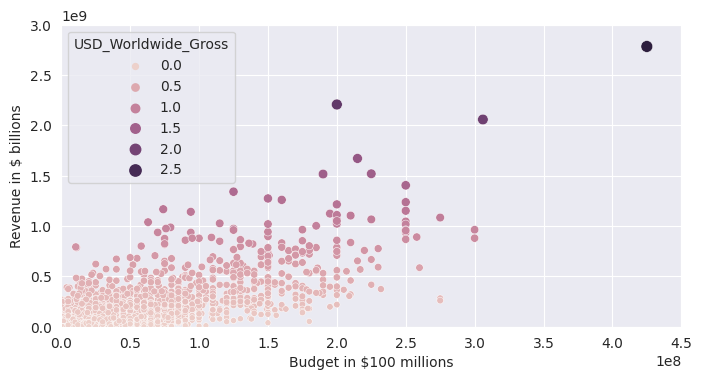

In [32]:
plt.figure(figsize=(8, 4), dpi=100)
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                  x='USD_Production_Budget', 
                  y='USD_Worldwide_Gross',
                  hue='USD_Worldwide_Gross', # colour
                  size='USD_Worldwide_Gross',) # dot size)

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

plt.show()

Now our higher grossing movies are bigger and darker on our chart.

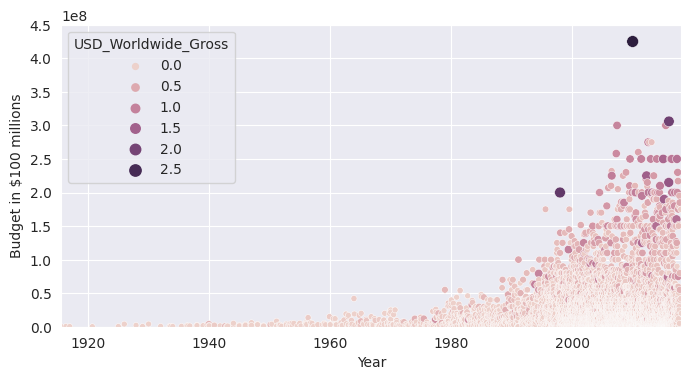

In [33]:
plt.figure(figsize=(8,4), dpi=100)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
    
plt.show()

What do we see here? What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

**Now, lets group the movies into decade, so that for instance, 1991 or 1992 or 1999 becomes 1990, also, 2001 or 2006 or 2008 becomes 2000.**

In [34]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
dt_index

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)

In [35]:
years = dt_index.year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [36]:
data_clean['Decade'] = (years//10)*10
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000.0,11000000.0,10000000.0,1910
1,5140,1916-05-09,Intolerance,385907.0,0.0,0.0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,1920
4,5222,1925-01-01,The Big Parade,245000.0,22000000.0,11000000.0,1920


**Categorizing our data into two grouyups: movies produced before 1970 and movies after 1969.**

In [37]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [38]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,153.000000
mean,4274.771242,4.611298e+06,3.041963e+07,2.238947e+07,1949.150327
std,742.137130,5.713649e+06,5.493183e+07,3.264175e+07,12.719014
min,1253.000000,1.000000e+05,0.000000e+00,0.000000e+00,1910.000000
25%,3973.000000,1.250000e+06,5.273000e+06,5.000000e+06,1940.000000
50%,4434.000000,2.900000e+06,1.000000e+07,1.000000e+07,1950.000000
75%,4785.000000,5.000000e+06,3.320810e+07,2.835000e+07,1960.000000
max,5299.000000,4.200000e+07,3.905252e+08,1.986805e+08,1960.000000


The cut-off for our calculation is 1960 in the Decade column because this will still include 1969. When we inspect our old_films DataFrame we see that it only includes 153 films. As we saw in the bubble chart, the bulk of films in the dataset have been released in the last 30 years.

**What is the most expensive film prior to 1970?**

In [41]:
old_films.sort_values('USD_Production_Budget', ascending=False)[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000.0,71000000.0,57000000.0,1960
150,2175,1969-12-16,"Hello, Dolly",24000000.0,33208099.0,33208099.0,1960
143,2465,1969-01-01,Sweet Charity,20000000.0,8000000.0,8000000.0,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000.0,15473333.0,15473333.0,1960
148,2375,1969-10-15,Paint Your Wagon,20000000.0,31678778.0,31678778.0,1960


The most expensive film prior to 1970 was Cleopatra, with a production budget of $42 million. That's some serious 1960s money, and judging by the trailer, a lot of it went into extravagant costumes, set design, and plenty of extras. Impressive.

**Visualise the relationship between the movie budget and the worldwide revenue: linear regression plot.**

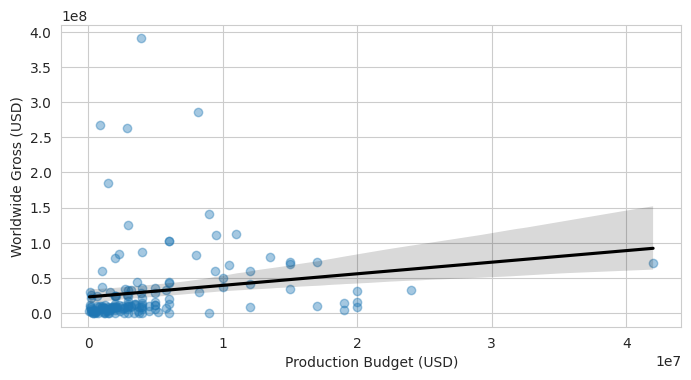

In [44]:
plt.figure(figsize=(8, 4), dpi=100)

with sns.axes_style("whitegrid"):
  ax = sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
  
  ax.set( xlabel='Production Budget (USD)',
           ylabel='Worldwide Gross (USD)')

plt.show()

What do we see here? Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

**But does the same hold true for the newer films?**

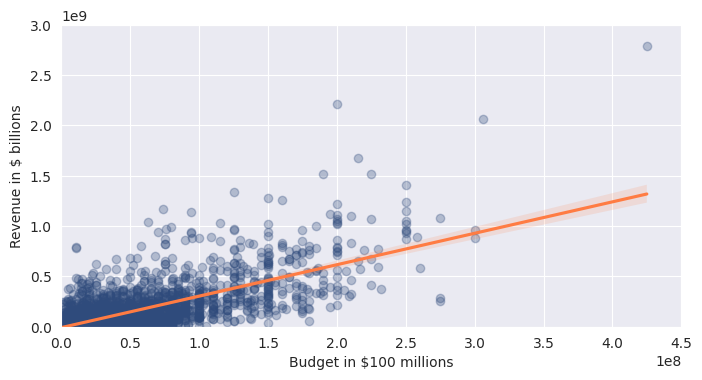

In [47]:
plt.figure(figsize=(8,4), dpi=100)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 
  
plt.show()

How do we interpret our chart? This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a `$150 million` budget is predicted to make slightly under `$500 million` by our regression line.

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that of film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional `$1` increase in the budget? To find out, we need to dive into the numbers underlying our regression model.

We are using a univariate regression. This is a regression with a single **explanatory variable** (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

In [49]:
# using sklearn library to create a linear regression model
lr = LinearRegression()

In [50]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

NOTE: Our LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget), so I've created some new DataFrames (X and y) here.

In [53]:
# Find the best-fit line
lr.fit(X, y)

LinearRegression()

In [54]:
# lookinng at the regression line intercept
lr.intercept_

array([-8650768.00661027])

In [55]:
# looking at the slope of the explanatory varrable
lr.coef_

array([[3.12259592]])

How do we interpret the y-intercept? Literally, means that if a movie budget is `$0`, the estimated movie revenue is `-$8.65 million`. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. 

What about the slope? The slope tells us that for every extra `$1` in the budget, movie revenue increases by `$3.1`. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

**How well does the linear regression model fits the data in a scale of 0 to 100 per cent?** 

In [56]:
lr.score(X, y)

0.5577032617720403

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable.

**Evaluating the intercept and slope of the linear regression model for *old_movies**

In [57]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

# fit the model
lr.fit(X, y)

# print model's marameters
print(f"Intercept: {lr.intercept_}")
print(f"slope: {lr.coef_}")
print(f"R-Squared: {lr.score(X, y)}")

Intercept: [22821538.63508039]
slope: [[1.64771314]]
R-Squared: 0.02937258620576877


Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low.


This makes sense considering how poorly our data points aligned with our line earlier.

**Making prediction with the model**

I've just estimated the intercept and slope for the Linear Regression model. Now we can use it to make a prediction! For example, how much global revenue does our model estimate for a film with a budget of `$350 million`?

In [58]:
budget = 350000000
revenue_estimate = lr.intercept_[0] + lr.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
